In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)

In [3]:
import numpy as np
import pandas as pd

X_df: pd.DataFrame = mnist["data"]
y_s: pd.Series = mnist["target"]

X = X_df.to_numpy()
y = y_s.to_numpy()

y = y.astype(np.uint8)

X_train: np.ndarray = X[:60000]
X_test: np.ndarray = X[60000:]
y_train: np.ndarray = y[:60000]
y_test: np.ndarray = y[60000:]

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


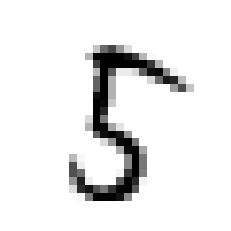

Label for above picture is:  5


In [42]:
import matplotlib.pyplot as plt

def show_random_num():
    random_num = np.random.randint(0, len(X))

    example_digit: np.ndarray = X[random_num]
    some_digit_image = example_digit.reshape(28, 28)

    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()

    print("Label for above picture is: ", y[random_num])
    return example_digit

show_random_num()

9

In [20]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(random_state=42))  # ovr is default
])

svm_clf.fit(X_train, y_train)

CPU times: user 7min 13s, sys: 538 ms, total: 7min 14s
Wall time: 7min 14s


/home/asgrim/.pyenv/versions/miniconda3-latest/envs/ml-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(random_state=42))])

In [21]:
svm_clf.predict([example_digit])

array([1], dtype=uint8)

In [22]:
from sklearn.metrics import accuracy_score

test_preds = svm_clf.predict(X_test)
accuracy_score(y_test, test_preds)

0.9121

In [14]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

svm_clf = LinearSVC(random_state=42)

param_grid = [
    {"loss": ["hinge", "squared_hinge"], "C": [0.1, 1, 10]},
]

grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_

/home/asgrim/.pyenv/versions/miniconda3-latest/envs/ml-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/asgrim/.pyenv/versions/miniconda3-latest/envs/ml-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/asgrim/.pyenv/versions/miniconda3-latest/envs/ml-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/asgrim/.pyenv/versions/miniconda3-latest/envs/ml-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/asgrim/.pyenv/versions/miniconda3-latest/envs/ml-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:120

CPU times: user 1h 1min 22s, sys: 2.98 s, total: 1h 1min 25s
Wall time: 1h 1min 19s


/home/asgrim/.pyenv/versions/miniconda3-latest/envs/ml-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 0.1, 'loss': 'hinge'}

In [31]:
from sklearn.metrics import f1_score

X_test_scaled = sc.transform(X_test)
y_test_pred = grid_search.predict(X_test_scaled)

accuracy_score(y_test, y_test_pred)
# f1_score(y_test, y_test_pred, average="micro")

0.9194

In [17]:
import joblib

joblib.dump(grid_search.best_estimator_, "models/mnist_svm_clf.jlib")

['models/mnist_svm_clf.jlib']

In [26]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=0.1, loss="hinge", max_iter=100000, random_state=42))
])

svm_clf.fit(X_train, y_train)

y_test_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

CPU times: user 14min 20s, sys: 857 ms, total: 14min 21s
Wall time: 14min 23s


/home/asgrim/.pyenv/versions/miniconda3-latest/envs/ml-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9193

In [33]:
final_svm_clf: LinearSVC = joblib.load("models/mnist_svm_clf.jlib")
y_test_pred = final_svm_clf.predict(sc.transform(X_test))
# accuracy_score(y_test, y_test_pred)
final_svm_clf.score(sc.transform(X_test), y_test)

0.9194

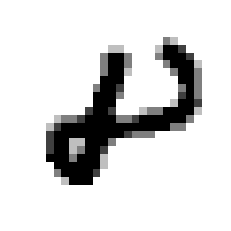

Label for above picture is:  8


In [47]:
example_digit = show_random_num()

In [48]:
final_svm_clf.predict([example_digit])

array([8], dtype=uint8)